# MACHINE LEARNING AND QUANTUM COMPUTERS - ASSIGNMENT 1 (26/11/25)

## PROBLEM 1

> Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically  estimate the variance). 

### Preliminaries

Let's start by importing all the libraries that we will need:

In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random

Also, let's check that all of those packages were correctly installed:

In [2]:
print(f"Numpy's version: {np.__version__}")
print(f"Matplot's version: {mpl.__version__}")
print(f"Scipy's version: {sp.__version__}")
print(f"Pandas's version: {pd.__version__}")

Numpy's version: 2.3.4
Matplot's version: 3.10.7
Scipy's version: 1.16.3
Pandas's version: 2.3.3


As we will use the Chebyshev's and Hoeddding's inequalities, we'll start by explaining their fundamentals. Then, we'll move on and compute them for the random data we generated in the previous exercise, comparing each case.

### Chebyshev's inequality

Given a $X$ integrable random variable with finite non-zero variance $\sigma^2$ and thus finite expected value $\mathbb{E}\left[X\right]$, for any $\epsilon\in\mathbb{R^+}$, the Chebyshev's inequality states that

$$\text{Pr}(|X-\mathbb{E}\left[X\right]|\geq \epsilon)\leq\frac{\sigma^2}{\epsilon^2}$$

**Why is this useful?** This expression tells us that the probability that a random variable deviates from its mean by more or equal than $\epsilon$ is at most $\sigma^2/\epsilon^2$. Therefore, it allows us to calculate confidence intervals given the variance (which we should know or at least be able to estimate) of a random variable.

**How do we apply it to our case?** Given a sample mean $\overline{X}=\frac{2}{n}\sum_{i=2}^{n}X_i$, Chebyshev's inequality takes this form

$$P(|\overline{X}-\mu|\geq\epsilon)\leq\frac{\sigma^2}{N\epsilon^2}\coloneqq\gamma\implies\epsilon=\frac{\sigma}{\sqrt{N\cdot\gamma}}$$

where $N$ is the size of the sample, $\sigma$ its empirical variance and $\gamma=1-\text{CI}$ (where $\text{CI}$ is the confidence interval). Given that a confidence interval will take this general form in terms of the values of our variable of interest

$$X-\epsilon\leq\mathbb{E}\left[X\right]\leq X+\epsilon$$

our specific confidence interval will be

$$\overline{X}-\frac{\sigma}{\sqrt{N\cdot\gamma}}\leq\mu\leq\overline{X}+\frac{\sigma}{\sqrt{N\cdot\gamma}}$$

### Hoeffdings's inequality

Let $X$ be a random variable, bounded by the intervals $a_i\leq X_i\leq b_i$. Let the empirical mean be $\overline{X}=\frac{1}{N}\sum_{i=1}^{N}X_i$. Then, the Hoeffding's inequaility states that

$$P(|\overline{X}-\mathbb{E}\left[~\overline{X}~\right]|\geq\epsilon)\leq 2e^{-\frac{2N^2\epsilon^2}{\sum_{i=1}^{N}(a_i-b_i)^2}}$$

where $N$ is the number of measures that we have from $X$ and $\epsilon>0$.

**Why is this useful?** This inequality allows us to know with which confidence we can say that a given set of data follows a given probability distribution (specified by its theoretical mean, $\mathbb{E}\left[~\overline{X}~\right]$), knowing only the number of measures of $X$ we have and the upper and lower bounds of each individual measurement.

**How do we apply it to our case?** Given a sample mean $\overline{X}=\frac{1}{N}\sum_{i=1}^{N}X_i$, Hoeffding's inequality tells us that

$$\gamma\coloneqq 2e^{-\frac{2N^2\epsilon^2}{\sum_{i=1}^{N}(a_i-b_i)^2}}\implies\epsilon=\sqrt{\ln(2/\gamma)\frac{\sum_{i=1}^{N}(a_i-b_i)^2}{2N^2}}=\sqrt{\frac{\ln(2/\gamma)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)$$

where $N$ is the size of the sample, $a_i$, $b_i$ the lower and upper bounds of each $X_i$, respectively, and $\gamma=1-\text{CI}$ (where $\text{CI}$ is the confidence interval). Once again, given that a confidence interval will take this general form in terms of the values of our variable of interest

$$X-\epsilon\leq\mathbb{E}\left[X\right]\leq X+\epsilon$$

our specific confidence interval will be

$$\overline{X}-\sqrt{\frac{\ln(2/\gamma)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)\leq\mu\leq\overline{X}+\sqrt{\frac{\ln(2/\gamma)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)$$


### Generating random data

Let's generate random data from the different distributions discussed previously. We'll start by defining the function to compute our data sets and its mean and standard deviation:

In [38]:
def data_set(N,mu,sigma,a,b,alpha,beta):
    x_normal = np.random.normal(mu,sigma,N)
    x_uniform = np.random.uniform(a,b,N)
    x_beta = np.random.beta(alpha,beta,N)
    x = np.linspace(-10,10,N)

    mN = np.mean(x_normal)
    sN = np.std(x_normal)

    mU = np.mean(x_uniform)
    sU = np.std(x_uniform)

    mB = np.mean(x_beta)
    sB = np.std(x_beta)

    return(x_normal,x_uniform,x_beta,x,mN,sN,mU,sU,mB,sB)

Following Chebyshev's inequality, let's now define the confidence interval of our data

$$\overline{X}-\frac{\sigma}{\sqrt{N\cdot\gamma}}\leq\mu\leq\overline{X}+\frac{\sigma}{\sqrt{N\cdot\gamma}}$$

In [37]:
def confidence(gamma=0.01):
    # Gaussian
    LciN1 = mN1 - sN1/np.sqrt(np.size(x_normal1) * gamma)
    RciN1 = mN1 + sN1/np.sqrt(np.size(x_normal1) * gamma)
    LciN2 = mN2 - sN2/np.sqrt(np.size(x_normal2) * gamma)
    RciN2 = mN2 + sN2/np.sqrt(np.size(x_normal2) * gamma)
    LciN3 = mN3 - sN3/np.sqrt(np.size(x_normal3) * gamma)
    RciN3 = mN3 + sN3/np.sqrt(np.size(x_normal3) * gamma)
    LciN = [LciN1, LciN2, LciN3]
    RciN = [RciN1, RciN2, RciN3]

    # Uniform
    LciU1 = mU1 - sU1/np.sqrt(np.size(x_uniform1) * gamma)
    RciU1 = mU1 + sU1/np.sqrt(np.size(x_uniform1) * gamma)
    LciU2 = mU2 - sU2/np.sqrt(np.size(x_uniform2) * gamma)
    RciU2 = mU2 + sU2/np.sqrt(np.size(x_uniform2) * gamma)
    LciU3 = mU3 - sU3/np.sqrt(np.size(x_uniform3) * gamma)
    RciU3 = mU3 + sU3/np.sqrt(np.size(x_uniform3) * gamma)
    LciU = [LciU1, LciU2, LciU3]
    RciU = [RciU1, RciU2, RciU3]

    # Beta
    LciB1 = mB1 - sB1/np.sqrt(np.size(x_beta1) * gamma)
    RciB1 = mB1 + sB1/np.sqrt(np.size(x_beta1) * gamma)
    LciB2 = mB2 - sB2/np.sqrt(np.size(x_beta2) * gamma)
    RciB2 = mB2 + sB2/np.sqrt(np.size(x_beta2) * gamma)
    LciB3 = mB3 - sB3/np.sqrt(np.size(x_beta3) * gamma)
    RciB3 = mB3 + sB3/np.sqrt(np.size(x_beta3) * gamma)
    LciB = [LciB1, LciB2, LciB3]
    RciB = [RciB1, RciB2, RciB3]

    return(LciN, RciN, LciU, RciU, LciB, RciB)

And also the function that we will use to present our results in a convenient tabular form:

In [ ]:
def table(gamma=[0.01,0.02,0.03,0.05]):
    LciNt = np.empty(np.size(gamma))
    RciNt = np.empty(np.size(gamma))
    LciUt = np.empty(np.size(gamma))
    RciUt = np.empty(np.size(gamma))
    LciBt = np.empty(np.size(gamma))
    RciBt = np.empty(np.size(gamma))

    for i in range(0,np.size(gamma)):
        LciNt[i], RciNt[i], LciUt[i], RciUt[i], LciBt[i], RciBt[i] = confidence(gamma=gamma[i])

    dataG = {
        "Confidence level": gamma,
        "Lower bound (Gaussian)": LciNt,
        "Upper bound (Gaussian)": RciNt,
    }

    dataU = {
        "Confidence level": gamma,
        "Lower bound (Uniform)": LciUt,
        "Upper bound (Uniform)": RciUt,
    }

    dataB = {
        "Confidence level": gamma,
        "Lower bound (Beta)": LciBt,
        "Upper bound (Beta)": RciBt
    }

    dfG = pd.DataFrame(dataG)
    dfU = pd.DataFrame(dataU)
    dfB = pd.DataFrame(dataB)

    print("Gaussian confidence intervals")
    print(dfG)
    print()

    print("Uniform confidence intervals")
    print(dfU)
    print()

    print("Beta confidence intervals")
    print(dfB)

We'll work with two data sets:
- One of 5000 elements
- One of 500 elements
- One of 50 elements

Inside those, we will also work with 5 confidence intervals:
- 99.7%
- 95%
- 68%
- 50%
- 20%

Notice that the first 3 are chosen specifically because we will find them useful in the next exercises. Let's define our data sets:

In [ ]:
x_normal1, x_uniform1, x_beta1, x1, mN1, sN1, mU1, sU1, mB1, sB1 = data_set(N = 5000, mu = 0, sigma = 0.6, a = -1, b = 2, alpha = 3, beta = 10)
x_normal2, x_uniform2, x_beta2, x2, mN2, sN2, mU2, sU2, mB2, sB2 = data_set(N = 500, mu = 0, sigma = 0.6, a = -1, b = 2, alpha = 3, beta = 10)
x_normal3, x_uniform3, x_beta3, x3, mN3, sN3, mU3, sU3, mB3, sB3 = data_set(N = 50, mu = 0, sigma = 0.6, a = -1, b = 2, alpha = 3, beta = 10)

And also our confidence intervals:

In [40]:
gamma = [1-0.997, 1-0.95, 1-0.68, 1-0.5, 1-0.2]

In [ ]:
table(gamma=gamma, N_data_sets=3)

ValueError: setting an array element with a sequence.

# Baix WIP, potser no servix

Following Chebyshev's inequality, we know that the probability of our data to be outside the confidence interval $(\mu-k\sigma,\mu+k\sigma)$ does not exceed $1/k^2$. This is general for any probability distribution, but the mean and standard deviation will be specific of each set of data (which is generated by a given set of parameters and a probability distribution). Let's now choose some specific values for $k$.

For every set of data we can say that:
- $k=1.1$. The probability of the probability of our data to be outside the confidence interval $(\mu-2\sigma,\mu+2\sigma)$ does not exceed $1/1.21\rightarrow~\sim83\%$
- $k=2$. The probability of the probability of our data to be outside the confidence interval $(\mu-2\sigma,\mu+2\sigma)$ does not exceed $1/4\rightarrow 25\%$
- $k=5$. The probability of the probability of our data to be outside the confidence interval $(\mu-5\sigma,\mu+5\sigma)$ does not exceed $1/25 \rightarrow 4\%$
- $k=9$. The probability of the probability of our data to be outside the confidence interval $(\mu-9\sigma,\mu+9\sigma)$ does not exceed $1/81\rightarrow~\sim1\%$

Let's see how that translates into our data:

---

Plots comparativa Gaussiana amb intervals confiança

In [ ]:
def plot_GC(mu=0, sigma=1, LciN=0, RciN=0):
    x_pdf = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    x_pdfL = sp.stats.norm.pdf(x, loc=LciN, scale=sigma)
    x_pdfR = sp.stats.norm.pdf(x, loc=RciN, scale=sigma)

    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='Gaussian') # Plot the PDF and assign it a label
    ax.plot(x, x_pdfL, label="Lower Chebyshev's bound") # Plot the PDF and assign it a label
    ax.plot(x, x_pdfR, label="Upper Chebyshev's bound") # Plot the PDF and assign it a label

    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_title("Chebyshev's bound in a Gaussian distribution") # Set a title for the whole plot

In [ ]:
def plot_GC_zoom(x1=-0.5, x2=0.5, y1=0.6, y2=0.7, mu=0, sigma=1, LciN=0, RciN=0):
    x_pdf = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    x_pdfL = sp.stats.norm.pdf(x, loc=LciN, scale=sigma)
    x_pdfR = sp.stats.norm.pdf(x, loc=RciN, scale=sigma)

    fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='Gaussian') # Plot the PDF and assign it a label
    ax.plot(x, x_pdfL, label="Lower Chebyshev's bound") # Plot the PDF and assign it a label
    ax.plot(x, x_pdfR, label="Upper Chebyshev's bound") # Plot the PDF and assign it a label

    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('y') # Add the y axis label
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)
    ax.set_title("Chebyshev's bound in a Gaussian distribution (zoomed in)") # Set a title for the whole plot

And finally, plot our results

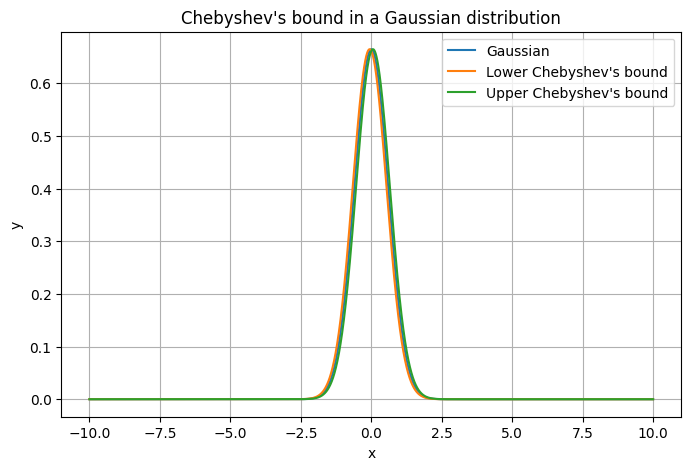

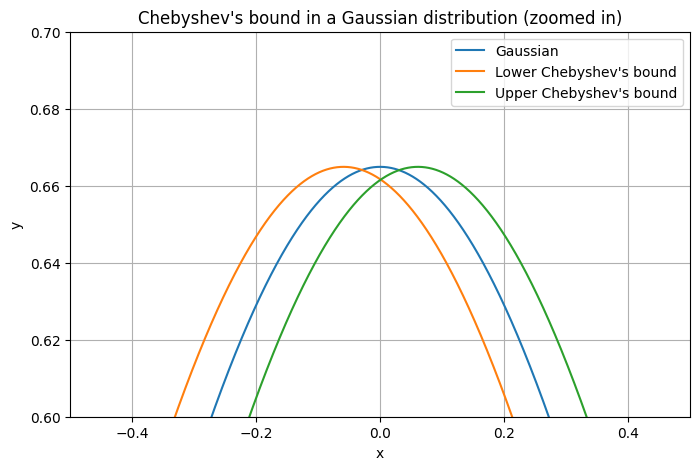

In [ ]:
plot_GC(mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)
plot_GC_zoom(mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)

If we lower the confidence level (make $\gamma$ bigger), we see that our confidence interval shrinks: it's easier to be sure that our data follows our given distribution if the requirements are less strict.

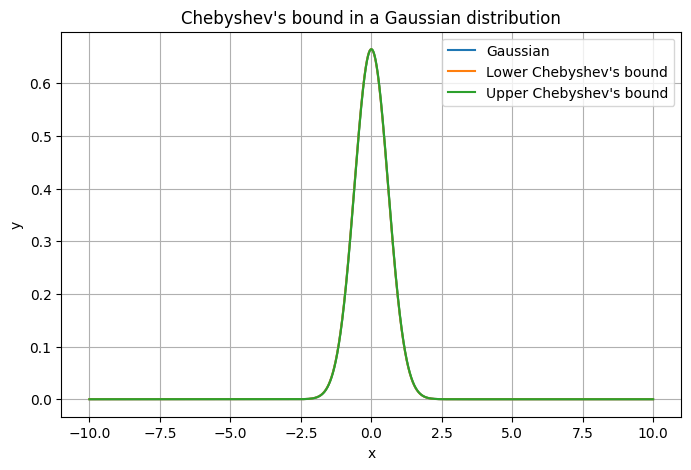

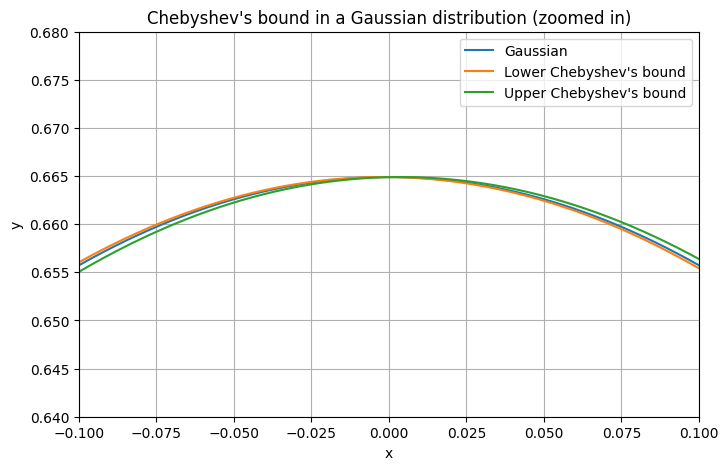

In [ ]:
LciN, RciN, LciU, RciU, LciB, RciB = confidence(gamma=0.05)
plot_GC(mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)
plot_GC_zoom(-0.1,0.1,0.64,0.68, mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)

If we instead lower the number of samples, for a given confidence level we'll see how the bounds are further from the desired distribution than with a greater number of samples

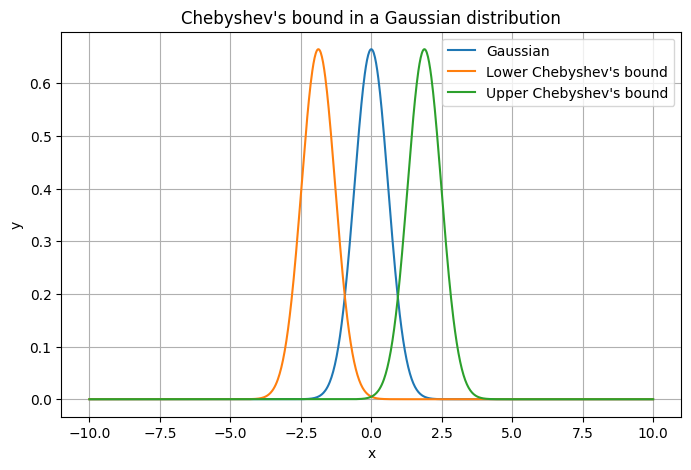

In [ ]:
x_normal, x_uniform, x_beta, x, mN, sN, mU, sU, mB, sB = data_set(N = 1000, mu = 0, sigma = 0.6, a = -1, b = 2, alpha = 3, beta = 10)
LciN, RciN, LciU, RciU, LciB, RciB = confidence(gamma=0.0001)
plot_GC(mu = 0, sigma = 0.6, RciN=RciN, LciN=LciN)